In [1]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Investiment_analysis').getOrCreate()

# loading data
#path = '/content/companies_utf8.csv'
#path = '/content/drive/MyDrive/BigData_DataScience/dataset/'

companies_path = '/workspaces/PredictiveSuccessfulFunding/companies_utf8.csv'
mapping_path = '/workspaces/PredictiveSuccessfulFunding/mapping_utf8.csv'
rounds_path = '/workspaces/PredictiveSuccessfulFunding/rounds2_utf8.csv'

# Load the CSV files into DataFrames
companies = spark.read.csv(companies_path, header=True, inferSchema=True)
mapping = spark.read.csv(mapping_path, header=True, inferSchema=True)
rounds = spark.read.csv(rounds_path, header=True, inferSchema=True)

#companies = spark.read.csv(path+"companies_utf8.csv", header=True, inferSchema=True)
#mapping = spark.read.csv(path+"mapping_utf8.csv", header=True, inferSchema=True)
#rounds = spark.read.csv(path+"rounds2_utf8.csv", header=True, inferSchema=True)

25/04/01 01:56:03 WARN Utils: Your hostname, codespaces-1dbd8a resolves to a loopback address: 127.0.0.1; using 10.0.2.39 instead (on interface eth0)
25/04/01 01:56:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/01 01:56:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/04/01 01:56:05 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


25/04/01 01:56:23 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [3]:
# dropping rows with null values
# companies = companies.dropna()
# mapping = mapping.dropna()
rounds = rounds.dropna()

In [4]:
################################################################################
### appliying lower case to column
################################################################################


from pyspark.sql.functions import trim
from pyspark.sql.functions import upper, lower

# # column names
# columns = rounds.columns

# # convert columns to lower case
# for col_name in columns:
#         rounds = rounds.withColumn(col_name, lower(rounds[col_name]))

# # column names
# columns = companies.columns

# # convert colums to lower case
# for col_name in columns:
#         companies = companies.withColumn(col_name, lower(companies[col_name]))
rounds = rounds.withColumn("company_permalink", lower(rounds["company_permalink"]))
companies = companies.withColumn("permalink", lower(companies["permalink"]))

In [5]:
### Spark copies
################################################################################

companies.createOrReplaceGlobalTempView("companies")
mapping.createOrReplaceGlobalTempView("mapping")
rounds.createOrReplaceGlobalTempView("rounds")

In [6]:
mapping.show(10)

+------------------+-------------------+------+--------------------------+-------------+------+-------------+--------------------------+------+---------------------------------------+
|     category_list|Automotive & Sports|Blanks|Cleantech / Semiconductors|Entertainment|Health|Manufacturing|News, Search and Messaging|Others|Social, Finance, Analytics, Advertising|
+------------------+-------------------+------+--------------------------+-------------+------+-------------+--------------------------+------+---------------------------------------+
|              NULL|                  0|     1|                         0|            0|     0|            0|                         0|     0|                                      0|
|                3D|                  0|     0|                         0|            0|     0|            1|                         0|     0|                                      0|
|       3D Printing|                  0|     0|                         0|      

In [7]:
companies.show(10)

+--------------------+--------------------+--------------------+--------------------+---------+------------+----------+--------------------+-------------+----------+
|           permalink|                name|        homepage_url|       category_list|   status|country_code|state_code|              region|         city|founded_at|
+--------------------+--------------------+--------------------+--------------------+---------+------------+----------+--------------------+-------------+----------+
| /organization/-fame|               #fame|  http://livfame.com|               Media|operating|         IND|        16|              Mumbai|       Mumbai|      NULL|
|/organization/-qo...|            :Qounter|http://www.qounte...|Application Platf...|operating|         USA|        DE|          DE - Other|Delaware City|  4/9/2014|
|/organization/-th...|(THE) ONE of THEM...| http://oneofthem.jp|   Apps|Games|Mobile|operating|        NULL|      NULL|                NULL|         NULL|      NULL|
|/or

In [8]:
companies.count()

66368

In [9]:
rounds.show(10)

+--------------------+-----------------------+------------------+------------------+----------+-----------------+
|   company_permalink|funding_round_permalink|funding_round_type|funding_round_code| funded_at|raised_amount_usd|
+--------------------+-----------------------+------------------+------------------+----------+-----------------+
| /organization/-fame|   /funding-round/9a...|           venture|                 B|  5/1/2015|         10000000|
|/organization/-th...|   /funding-round/65...|           venture|                 B|30-01-2014|          3406878|
|/organization/0-6...|   /funding-round/57...|           venture|                 A|19-03-2008|          2000000|
|/organization/0xdata|   /funding-round/3b...|           venture|                 B| 9/11/2015|         20000000|
|/organization/0xdata|   /funding-round/e1...|           venture|                 A|19-07-2014|          8900000|
|/organization/10-...|   /funding-round/0f...|           venture|                 A| 9/1

In [10]:
rounds.count()

28169

In [ ]:
# from pyspark.ml.feature import StringIndexer, OneHotEncoder
# from pyspark.ml import Pipeline

# # StringIndexer for the funding_round_type column
# indexer_type = StringIndexer(inputCol="funding_round_type", outputCol="funding_round_type_index")

# # Fit and transform the StringIndexer
# indexed_type = indexer_type.fit(rounds).transform(rounds)

# StringIndexer for the funding_round_code column
# indexer_code = StringIndexer(inputCol="funding_round_code", outputCol="funding_round_code_index")

# # Fit and transform the StringIndexer
# indexed_code = indexer_code.fit(indexed_type).transform(indexed_type)

# # OneHotEncoder for the indexed columns
# encoder = OneHotEncoder(inputCols=["funding_round_type_index", "funding_round_code_index"],
#                         outputCols=["funding_round_type_encoded", "funding_round_code_encoded"])

# # Fit and transform the encoder
# encoded = encoder.fit(indexed_code).transform(indexed_code)

# # Drop the original columns
# encoded = encoded.drop("funding_round_type", "funding_round_code")

# # Show the encoded DataFrame
# encoded.show(10)


In [11]:
### pivoting the funding types and codes from within two columns to multiple columns
################################################################################

from pyspark.sql.functions import col

# distinct funding round types
#funding_round_types = [row[0] for row in rounds.select("funding_round_type").distinct().collect()]

# Pivot, transform funding_round_type into separate columns
#pivot_df_type = rounds.groupBy("company_permalink").pivot("funding_round_type", funding_round_types).count().fillna(0)
pivot_df_type = rounds.groupBy("company_permalink").pivot("funding_round_type").count().fillna(0)

# Pivot, transform funding_round_code into separate columns
pivot_df_code = rounds.groupBy("company_permalink").pivot("funding_round_code").count().fillna(0)

# Group by company_permalink and sum raised_amount_usd column
sum_df = rounds.groupBy("company_permalink").sum("raised_amount_usd").fillna(0)

# Join the DataFrames and sum DataFrame with company_permalink column
result_df = pivot_df_type.join(pivot_df_code, "company_permalink", "left").join(sum_df, "company_permalink", "inner").fillna(0)

#print (funding_round_types)

result_df.show(10)


+--------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+---+---+---+---+---+---+---+---+----------------------+
|   company_permalink|angel|convertible_note|debt_financing|post_ipo_equity|private_equity|seed|undisclosed|venture|  A|  B|  C|  D|  E|  F|  G|  H|sum(raised_amount_usd)|
+--------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+---+---+---+---+---+---+---+---+----------------------+
|/organization/cor...|    0|               0|             0|              0|             0|   0|          0|      1|  1|  0|  0|  0|  0|  0|  0|  0|               5056350|
|/organization/e-b...|    0|               0|             0|              0|             0|   0|          0|      1|  1|  0|  0|  0|  0|  0|  0|  0|               2430000|
|/organization/att...|    0|               0|             0|              0|             0|   0|          0|      1|  0|  0|  1|  0|  0|  0|

In [12]:
result_df.count()

16974

In [13]:
# saving the CSV file
csv_path = "roundpivot.csv"

# DataFrame as a CSV file
result_df.coalesce(1).write.csv(csv_path, header=True, mode="overwrite")

In [14]:
# merging all the 3 files, each row represents one company
# in rounds file one company can be in more than one row, examle, one row can contain info regaring the seed funding, another row can contain info of venture funding
# mapping file has category info that can me mapped with, category_list, but each company can belong to multiple categories. In the query below the columns from mapping are already computed to show all the categories that a company belongs to

companiesRes = spark.sql("""SELECT lower(comp.permalink) as permalink, first(comp.name) as name, first(comp.category_list) as category_list, first(comp.status) as status, first(comp.country_code) as country_code, first(comp.city) as city, first(comp.founded_at) as founded_at, sum(comp.raised_amount_usd) as total_raised_amount_usd, max(m.`Automotive & Sports`), max(m.Blanks), max(m.`Cleantech / Semiconductors`), max(m.Entertainment), max(m.Health), max(m.Manufacturing), max(m.`News, Search and Messaging`), max(m.Others), max(m.`Social, Finance, Analytics, Advertising`)
                            FROM
                            (SELECT *, explode(split(category_list, '\\\\|')) AS category
                            FROM global_temp.companies c
                            LEFT JOIN global_temp.rounds r on LOWER(c.permalink) = LOWER(r.company_permalink)
                            ) comp
                            LEFT JOIN global_temp.mapping m on comp.category = m.category_list
                            GROUP BY LOWER(comp.permalink)""")

In [15]:
companiesRes.show(10)

+--------------------+--------------------+--------------------+---------+------------+-----------------+----------+-----------------------+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------------------------+
|           permalink|                name|       category_list|   status|country_code|             city|founded_at|total_raised_amount_usd|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)|max(Entertainment)|max(Health)|max(Manufacturing)|max(News, Search and Messaging)|max(Others)|max(Social, Finance, Analytics, Advertising)|
+--------------------+--------------------+--------------------+---------+------------+-----------------+----------+-----------------------+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------

In [16]:
companiesRes.count()

63220

Query 1 : To show country wise amount invested by successfull startups


In [17]:
from pyspark.sql.functions import lower, trim, sum, col

# Clean and normalize `permalink` column in `companies` DataFrame
cleaned_companies = companies.withColumn("permalink", lower(trim(companies["permalink"])))

# Clean and normalize `company_permalink` column in `rounds` DataFrame
cleaned_rounds = rounds.withColumn("company_permalink", lower(trim(rounds["company_permalink"])))

# Perform case-insensitive join on cleaned DataFrames
joined_df = cleaned_companies.join(cleaned_rounds, cleaned_companies["permalink"] == cleaned_rounds["company_permalink"], "inner")

# Group by `country_code` and calculate sum of `raised_amount_usd`
country_raised_amount = joined_df.groupBy("country_code") \
                                 .agg(sum("raised_amount_usd").alias("total_raised_amount_usd")) \
                                 .orderBy("total_raised_amount_usd", ascending=False)

filtered_country_raised_amount = country_raised_amount.filter(col("country_code").isNotNull())
filtered_country_raised_amount.show()

#=======================================
citywise_raised_amount = joined_df.groupBy("city") \
                                 .agg(sum("raised_amount_usd").alias("total_raised_amount_usd")) \
                                 .orderBy("total_raised_amount_usd", ascending=False)

# Show the aggregated results
#country_raised_amount.show()
filtered_citywise_raised_amount = citywise_raised_amount.filter(col("city").isNotNull())

# Show the filtered DataFrame
filtered_citywise_raised_amount.show()

+------------+-----------------------+
|country_code|total_raised_amount_usd|
+------------+-----------------------+
|         USA|           295816377809|
|         CHN|            34169957236|
|         GBR|            12828811616|
|         IND|            10337270609|
|         CAN|             6197145696|
|         ISR|             5215961522|
|         FRA|             4782498316|
|         DEU|             4715956157|
|         SWE|             2402011935|
|         CHE|             2275097343|
|         JPN|             2184674259|
|         SGP|             2170010671|
|         RUS|             1287400005|
|         ESP|             1251141528|
|         NLD|             1226548295|
|         BRA|              986915191|
|         MYS|              844658787|
|         IRL|              786203365|
|         DNK|              673894733|
|         AUS|              664064975|
+------------+-----------------------+
only showing top 20 rows

+-------------+-----------------------

# Query 3
**Source of funding and break it out by status (still operating, acquired, etc)**

In [18]:
query3 = spark.sql("""SELECT
                      funding_round_type,
                      RaisedMoney,
                      CompanyCount,
                      concat(Acquired_Companies, ' (', ROUND((Acquired_Companies/CompanyCount)*100, 2), '%)' ) as Aquired_Companies,
                      concat(Closed_Companies, ' (', ROUND((Closed_Companies/CompanyCount)*100, 2), '%)' ) as Closed_Companies,
                      concat(ipo_Companies, ' (', ROUND((ipo_Companies/CompanyCount)*100, 2), '%)' ) as ipo_Companies,
                      concat(Operating_Companies, ' (', ROUND((Operating_Companies/CompanyCount)*100, 2), '%)' ) as Operating_Companies

                      FROM
                      (SELECT comp.funding_round_type, sum(comp.raised_amount_usd) as RaisedMoney, count(lower(comp.name)) as CompanyCount, sum(if(comp.status='acquired',1,0)) as Acquired_Companies, sum(if(comp.status='closed',1,0)) as Closed_Companies, sum(if(comp.status='ipo',1,0)) as ipo_Companies, sum(if(comp.status='operating',1,0)) as Operating_Companies
                      FROM
                      (SELECT *, explode(split(category_list, '\\\\|')) AS category
                      FROM global_temp.companies c
                      LEFT JOIN global_temp.rounds r on LOWER(c.permalink) = LOWER(r.company_permalink)
                      ) comp
                      LEFT JOIN global_temp.mapping m on comp.category = m.category_list
                      WHERE comp.raised_amount_usd IS NOT NULL
                      GROUP BY comp.funding_round_type
                      ORDER BY RaisedMoney DESC) funding""")

In [19]:
query3.show()

+------------------+-------------+------------+-----------------+----------------+-------------+-------------------+
|funding_round_type|  RaisedMoney|CompanyCount|Aquired_Companies|Closed_Companies|ipo_Companies|Operating_Companies|
+------------------+-------------+------------+-----------------+----------------+-------------+-------------------+
|           venture|1040299580962|       67858|   12253 (18.06%)|    3694 (5.44%)| 3153 (4.65%)|     48758 (71.85%)|
|              seed|   1218673751|         351|       14 (3.99%)|      11 (3.13%)|     0 (0.0%)|       326 (92.88%)|
|    private_equity|    190703519|           6|         0 (0.0%)|        0 (0.0%)|     0 (0.0%)|         6 (100.0%)|
|       undisclosed|    172300910|          19|         0 (0.0%)|        0 (0.0%)|     0 (0.0%)|        19 (100.0%)|
|             angel|    130431138|          68|         0 (0.0%)|        0 (0.0%)|     0 (0.0%)|        68 (100.0%)|
|    debt_financing|     91467000|           8|         0 (0.0%)

**Objective:**

Here we are trying to show the source of funding in all the companes, and also break it down by the current status of the company weather it was aquired, closed, operating or went public (ipo).

---

**Observations:**

Venture Capitals invested in majority of the companies and the invested amount was highest compared to all other funding rounds. Followed by Private equity which is a quatar of the Venture investiment, Debt financing and so on.

Money invested through Non equity assistance round was the lowest and no. of companies that had this round was also low. (A non-equity assistance round occurs when a company or investor provides office space or mentorship and does not get equity in return) As there is no equity in return or profit for the investors investing in this type of round, its understandable that the investiment in this round was the lowest compared to other rounds, and at this stage the company could be very small and the operational cost would also be lower.
The next lowest investiment was through Crowd funding.


We have also shown the total no. of companies per each funding round and also the breakdown of the latest status of the company.
* Only a small portion, below 8% of the companies were closed after investiment in all round except Angel investiment, where it is slightly over 10%.
* Also about 5% of the companes went public(ipo) in almost all the funding rounds, except secondary_market which had 27% of the companies go public, and Post IPO equity/debt has over 80% because the compmaies raising funding in these rounds are already public.


---


(Note: Here same company can be in multiple rounds, because it could start with crowd funding in the begining and later raise money through seed funding and could raise money through Venture capitals. In this part of the query we are just breaking down the investiment in various funding rounds)

Query 5: list of companies and the funding raised by each company. (Same company can be in multiple rows based on the type of funding raised) This will be used later to predict if the company is going to be operating, going public, closed etc

In [20]:
query5 = spark.sql("""SELECT lower(comp.permalink) as permalink, first(comp.name) as name, first(comp.country_code) as country_code, first(comp.state_code) as state_code, first(region) as region, first(city) as city, first(comp.founded_at) as founded_at,
                      sum(comp.raised_amount_usd) as total_raised_amount_usd, first(comp.funding_round_type) as funding_round_type, first(funding_round_code) as funding_round_code, first(funded_at) as funded_at,
                      max(m.`Automotive & Sports`) as `Automotive & Sports`, max(m.Blanks) as Blanks, max(m.`Cleantech / Semiconductors`) as `Cleantech / Semiconductors`, max(m.Entertainment) as Entertainment, max(m.Health) as Health, max(m.Manufacturing) as Manufacturing, max(m.`News, Search and Messaging`) as `News, Search and Messaging`, max(m.Others) as Others, max(m.`Social, Finance, Analytics, Advertising`) as `Social, Finance, Analytics, Advertising`,
                      first(comp.status) as status
                      FROM
                      (SELECT *, explode(split(category_list, '\\\\|')) AS category
                      FROM global_temp.companies c
                      LEFT JOIN global_temp.rounds r on LOWER(c.permalink) = LOWER(r.company_permalink)
                      ) comp
                      LEFT JOIN global_temp.mapping m on comp.category = m.category_list
                      GROUP BY LOWER(comp.funding_round_type), LOWER(comp.permalink)""")

In [21]:
query5.show()

25/04/01 01:58:01 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+--------------------+------------+----------+-------------+-----------------+----------+-----------------------+------------------+------------------+---------+-------------------+------+--------------------------+-------------+------+-------------+--------------------------+------+---------------------------------------+---------+
|           permalink|                name|country_code|state_code|       region|             city|founded_at|total_raised_amount_usd|funding_round_type|funding_round_code|funded_at|Automotive & Sports|Blanks|Cleantech / Semiconductors|Entertainment|Health|Manufacturing|News, Search and Messaging|Others|Social, Finance, Analytics, Advertising|   status|
+--------------------+--------------------+------------+----------+-------------+-----------------+----------+-----------------------+------------------+------------------+---------+-------------------+------+--------------------------+-------------+------+-------------+-----------------

In [22]:
### Join the two DataFrames on 'permalink' and 'company_permalink'
################################################################################

joined_df = companiesRes.join(result_df, companiesRes["permalink"] == result_df["company_permalink"], "left")

joined_df.show(truncate=False)

+-------------------------------------------------+-----------------------------------+-----------------------------------------+---------+------------+-----------------+----------+-----------------------+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------------------------+--------------------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+----+----+----+----+----+----+----+----+----------------------+
|permalink                                        |name                               |category_list                            |status   |country_code|city             |founded_at|total_raised_amount_usd|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)|max(Entertainment)|max(Health)|max(Manufacturing)|max(News, Search and Messaging)|max(Others)|max(Social, Finance, Analyti

In [23]:
joined_df.count()

63220

In [24]:
### changing the name of the raised amount column
################################################################################

joined_df = joined_df.withColumnRenamed("sum(raised_amount_usd)", "raised_amount_usd")

joined_df.show(10)

+--------------------+--------------------+--------------------+---------+------------+-----------------+----------+-----------------------+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------------------------+--------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+----+----+----+----+----+----+----+----+-----------------+
|           permalink|                name|       category_list|   status|country_code|             city|founded_at|total_raised_amount_usd|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)|max(Entertainment)|max(Health)|max(Manufacturing)|max(News, Search and Messaging)|max(Others)|max(Social, Finance, Analytics, Advertising)|   company_permalink|angel|convertible_note|debt_financing|post_ipo_equity|private_equity|seed|undisclosed|venture|   A|   B|   C|

In [25]:
###  summary information on the columns
################################################################################

# Get a summary of all columns
df_summary = joined_df.describe()

# Show
df_summary.show()

# data types of all columns
column_data_types = [(field.name, field.dataType) for field in joined_df.schema.fields]

# Print
for col_name, data_type in column_data_types:
    print(f"Column: {col_name}, Data Type: {data_type}")

+-------+--------------------+--------------------+--------------------+---------+------------+----------------+----------+-----------------------+------------------------+-----------+-------------------------------+-------------------+-------------------+-------------------+-------------------------------+-------------------+--------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+
|summary|           permalink|                name|       category_list|   status|country_code|            city|founded_at|total_raised_amount_usd|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)| max(Entertainment)|        max(Health)| ma

In [26]:
# this way is not working

from pyspark.sql.functions import expr

# columns
columns_to_sum = [
    "max(Automotive & Sports)",
    "max(Blanks)",
    "max(Cleantech / Semiconductors)",
    "max(Entertainment)",
    "max(Health)",
    "max(Manufacturing)",
    "max(News, Search and Messaging)",
    "max(Others)",
    "max(Social, Finance, Analytics, Advertising)"
]

# dictionary to store
results = {}

# Iterate
for column in columns_to_sum:
    # sum of raised_amount_usd where the column value is 1
    total_raised = joined_df.selectExpr(f"sum(case when '{column}' = 1 then raised_amount_usd else 0 end) as total_raised")

    result = total_raised.collect()[0]["total_raised"]

    # Store the result
    results[column] = result

# Print
print("Total raised amount USD for each category:")
for column, total_raised in results.items():
    print(f"{column}: {total_raised}")


Total raised amount USD for each category:
max(Automotive & Sports): 0
max(Blanks): 0
max(Cleantech / Semiconductors): 0
max(Entertainment): 0
max(Health): 0
max(Manufacturing): 0
max(News, Search and Messaging): 0
max(Others): 0
max(Social, Finance, Analytics, Advertising): 0


Total raised amount USD for each category:
max(Automotive & Sports): $22,241,973,233
max(Blanks): $0
max(Cleantech / Semiconductors): $97,770,065,473
max(Entertainment): $62,352,758,448
max(Health): $58,872,949,093
max(Manufacturing): $38,903,623,309
max(News, Search and Messaging): $109,060,883,858
max(Others): $192,826,830,895
max(Social, Finance, Analytics, Advertising): $114,224,036,529


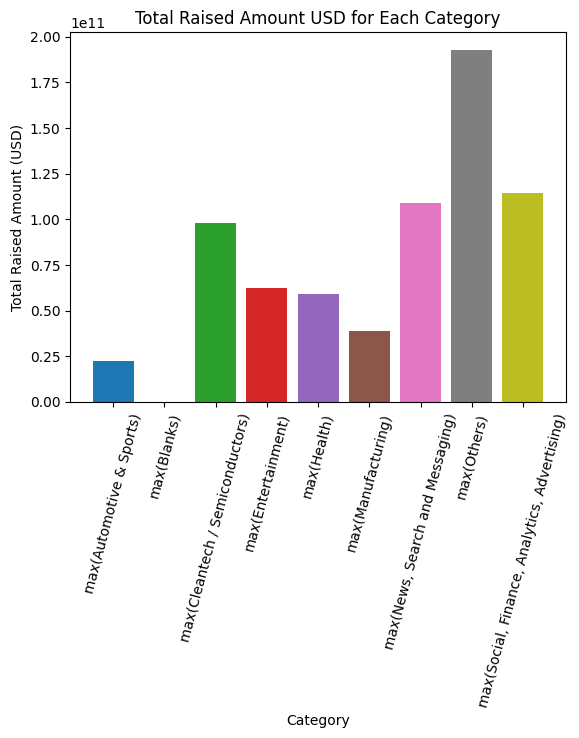

In [27]:
### Query to pull total amount invested by industry type
################################################################################
import matplotlib.pyplot as plt

# view
joined_df.createOrReplaceTempView("joined_df_view")

# Columns
columns_to_sum = [
    "max(Automotive & Sports)",
    "max(Blanks)",
    "max(Cleantech / Semiconductors)",
    "max(Entertainment)",
    "max(Health)",
    "max(Manufacturing)",
    "max(News, Search and Messaging)",
    "max(Others)",
    "max(Social, Finance, Analytics, Advertising)"
]

# Dictionary to
results = {}
# each column
for column in columns_to_sum:
    # total raised amount USD for each category
    query = f"""
        SELECT SUM(CASE WHEN `{column}` = 1 THEN raised_amount_usd ELSE 0 END) AS total_raised
        FROM joined_df_view
    """
    # Execute
    result = spark.sql(query).collect()[0]["total_raised"]

    # Store
    results[column] = result

# Print
print("Total raised amount USD for each category:")
# for column, total_raised in results.items():
#     print(f"{column}: {total_raised}")
#     plt.bar(column, total_raised)
for column, total_raised in results.items():
    total_raised_formatted = "${:,.0f}".format(total_raised)
    print(f"{column}: {total_raised_formatted}")
    plt.bar(column, total_raised)
# labels and title
plt.xlabel('Category')
plt.ylabel('Total Raised Amount (USD)')
plt.title('Total Raised Amount USD for Each Category')

# Rotate x-axis
plt.xticks(rotation=75)

# Show the plot
plt.show()

In [28]:
# path for e CSV file
csv_path = "join3.csv"

# PySpark DataFrame as a CSV file
joined_df.coalesce(1).write.csv(csv_path, header=True, mode="overwrite")

In [29]:
# columns to drop - name	category_list	status	country_code	city
# founded_at	total_raised_amount_usd  company_permalink
#
################################################################################

columns_to_drop1 = ["permalink", "name", "founded_at", "total_raised_amount_usd", "company_permalink"]
columns_to_drop2 = ["permalink", "name", "country_code", "city", "founded_at", "total_raised_amount_usd", "company_permalink"]

# new DataFrame by dropping the specified columns
joined_v1 = joined_df.drop(*columns_to_drop1)
joined_v2 = joined_df.drop(*columns_to_drop2)

joined_v1.show(10)

+--------------------+---------+------------+-----------------+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+----+----+----+----+----+----+----+----+-----------------+
|       category_list|   status|country_code|             city|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)|max(Entertainment)|max(Health)|max(Manufacturing)|max(News, Search and Messaging)|max(Others)|max(Social, Finance, Analytics, Advertising)|angel|convertible_note|debt_financing|post_ipo_equity|private_equity|seed|undisclosed|venture|   A|   B|   C|   D|   E|   F|   G|   H|raised_amount_usd|
+--------------------+---------+------------+-----------------+------------------------+-----------+-------------------------------+------------------+-

In [30]:
joined_v1f=joined_v1
joined_v1f = joined_v1f.dropna()

In [31]:
#joined_v1f.show(10)
joined_v1f.count()

15300

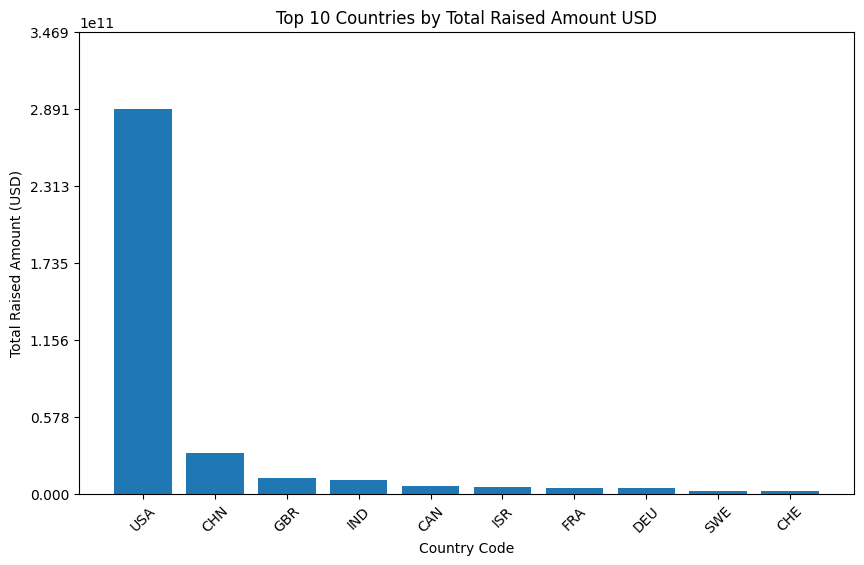

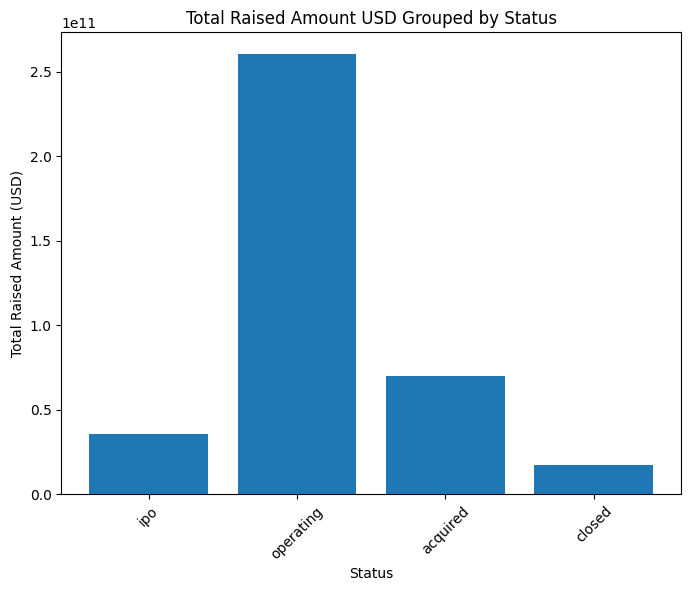

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by country_code and aggregate total raised_amount_usd
grouped_country = joined_v1f.groupBy("country_code").agg({"raised_amount_usd": "sum"})

# Sort
sorted_country = grouped_country.orderBy(grouped_country["sum(raised_amount_usd)"].desc())

# top 10 rows
top_10_countries = sorted_country.limit(10)

# Convert to pandas
top_10_df = top_10_countries.toPandas()


plt.figure(figsize=(10, 6))
plt.bar(top_10_df["country_code"], top_10_df["sum(raised_amount_usd)"])
plt.xlabel("Country Code")
plt.ylabel("Total Raised Amount (USD)")
plt.title("Top 10 Countries by Total Raised Amount USD")
plt.xticks(rotation=45)


max_raised_amount = int(top_10_df["sum(raised_amount_usd)"].max())
increment = max_raised_amount // 5
plt.yticks(range(0, max_raised_amount + increment, increment))

plt.show()

# Group by status and aggregate total raised_amount_usd
grouped_status = joined_v1f.groupBy("status").agg({"raised_amount_usd": "sum"})

# Convert to pandas
status_df = grouped_status.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(status_df["status"], status_df["sum(raised_amount_usd)"])
plt.xlabel("Status")
plt.ylabel("Total Raised Amount (USD)")
plt.title("Total Raised Amount USD Grouped by Status")
plt.xticks(rotation=45)
plt.show()


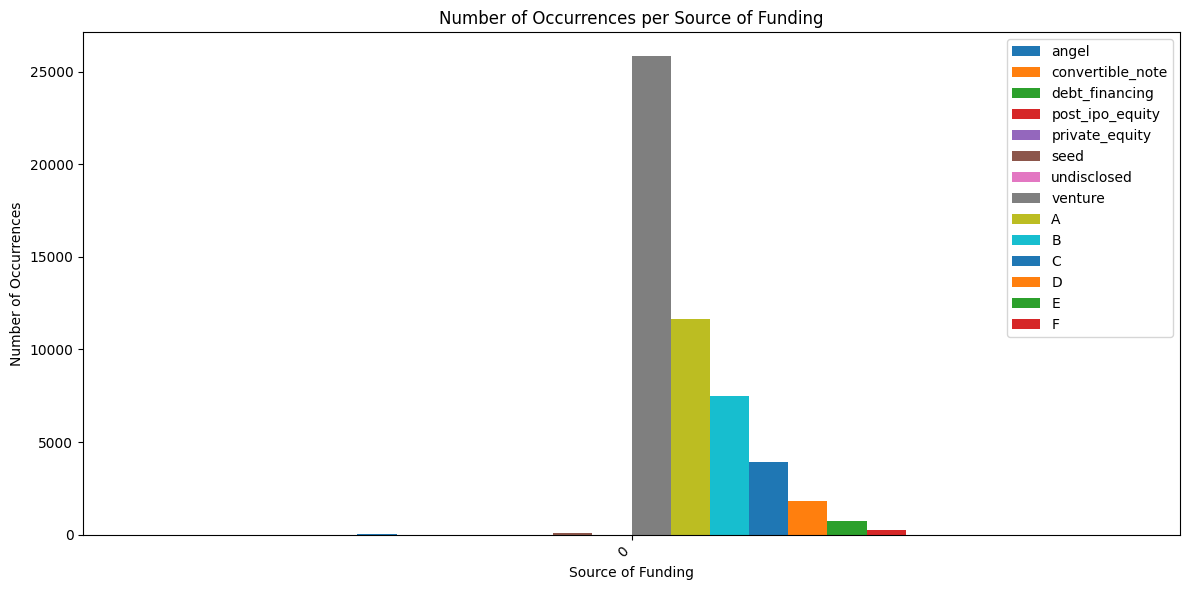

In [33]:
from pyspark.sql.functions import sum

# columns 13 through 27
selected_columns = joined_v1f.columns[13:27]

# Sum each column
sums = joined_v1f.select([sum(c).alias(c) for c in selected_columns]).toPandas()

# Plot
sums.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Source of Funding")
plt.ylabel("Number of Occurrences")
plt.title("Number of Occurrences per Source of Funding")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [34]:
from pyspark.sql.functions import when, col


# column_name
column_name = "raised_amount_usd"

# quantiles with 5% increments
quantiles = joined_v1f.approxQuantile(column_name, [i / 20.0 for i in range(1, 20)], 0.01)

# Discretize the column into 20 buckets
joined_v1f = joined_v1f.withColumn(column_name + "_decile",
                   when(col(column_name) <= quantiles[0], "1st 5%")
                   .when((col(column_name) > quantiles[0]) & (col(column_name) <= quantiles[1]), "2nd 5%")
                   .when((col(column_name) > quantiles[1]) & (col(column_name) <= quantiles[2]), "3rd 5%")
                   .when((col(column_name) > quantiles[2]) & (col(column_name) <= quantiles[3]), "4th 5%")
                   .when((col(column_name) > quantiles[3]) & (col(column_name) <= quantiles[4]), "5th 5%")
                   .when((col(column_name) > quantiles[4]) & (col(column_name) <= quantiles[5]), "6th 5%")
                   .when((col(column_name) > quantiles[5]) & (col(column_name) <= quantiles[6]), "7th 5%")
                   .when((col(column_name) > quantiles[6]) & (col(column_name) <= quantiles[7]), "8th 5%")
                   .when((col(column_name) > quantiles[7]) & (col(column_name) <= quantiles[8]), "9th 5%")
                   .when((col(column_name) > quantiles[8]) & (col(column_name) <= quantiles[9]), "10th 5%")
                   .when((col(column_name) > quantiles[9]) & (col(column_name) <= quantiles[10]), "11th 5%")
                   .when((col(column_name) > quantiles[10]) & (col(column_name) <= quantiles[11]), "12th 5%")
                   .when((col(column_name) > quantiles[11]) & (col(column_name) <= quantiles[12]), "13th 5%")
                   .when((col(column_name) > quantiles[12]) & (col(column_name) <= quantiles[13]), "14th 5%")
                   .when((col(column_name) > quantiles[13]) & (col(column_name) <= quantiles[14]), "15th 5%")
                   .when((col(column_name) > quantiles[14]) & (col(column_name) <= quantiles[15]), "16th 5%")
                   .when((col(column_name) > quantiles[15]) & (col(column_name) <= quantiles[16]), "17th 5%")
                   .when((col(column_name) > quantiles[16]) & (col(column_name) <= quantiles[17]), "18th 5%")
                   .when((col(column_name) > quantiles[17]) & (col(column_name) <= quantiles[18]), "19th 5%")
                   .otherwise("20th 5%"))


In [35]:
joined_v1f.show(10)

+--------------------+---------+------------+-------------+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+---+---+---+---+---+---+---+---+-----------------+------------------------+
|       category_list|   status|country_code|         city|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)|max(Entertainment)|max(Health)|max(Manufacturing)|max(News, Search and Messaging)|max(Others)|max(Social, Finance, Analytics, Advertising)|angel|convertible_note|debt_financing|post_ipo_equity|private_equity|seed|undisclosed|venture|  A|  B|  C|  D|  E|  F|  G|  H|raised_amount_usd|raised_amount_usd_decile|
+--------------------+---------+------------+-------------+------------------------+-----------+------------------------------

In [36]:
### indexing column categories into numerical values
################################################################################

from pyspark.ml.feature import StringIndexer
index_mappings = {}
# columns to index
columns_to_index = ["category_list", "status", "country_code", "raised_amount_usd_decile"]

# StringIndexer instance for each column
indexers = [StringIndexer(inputCol=column, outputCol=f"{column}_indexed").fit(joined_v1f) for column in columns_to_index]

# Transform the DataFrame
indexed_df = joined_v1f
for indexer in indexers:
    indexed_df = indexer.transform(indexed_df)
    column_name = indexer.getOutputCol()
    mappings = indexer.labels
    index_mappings[column_name] = {label: index for index, label in enumerate(mappings)}


In [37]:
### save the index mappings under the specified headings
################################################################################

with open("index_mappings.txt", "w") as file:
    for column in ["category_list", "status", "country_code", "raised_amount_usd_decile"]:
        file.write(f"Index mapping for {column}:\n")
        print(f"Index mapping for {column}:")
        mapping = index_mappings.get(f"{column}_indexed", {})
        for category, index in mapping.items():
            print(f"{category}: {index}")
            file.write(f"{category}: {index}\n")
        print()
        file.write("\n")

Index mapping for category_list:
Biotechnology: 0
Software: 1
Enterprise Software: 2
Clean Technology: 3
Mobile: 4
Health Care: 5
E-Commerce: 6
Hardware + Software: 7
Semiconductors: 8
Advertising: 9
Games: 10
Curated Web: 11
Security: 12
Web Hosting: 13
Manufacturing: 14
Health and Wellness: 15
Biotechnology|Health Diagnostics: 16
Social Media: 17
Biotechnology|Health Care: 18
Education: 19
Travel: 20
Messaging: 21
Technology: 22
EdTech|Education: 23
Pharmaceuticals: 24
Finance|FinTech: 25
Medical Devices: 26
News: 27
Consulting: 28
Public Relations: 29
Fashion: 30
Internet: 31
Hospitality: 32
Music: 33
Real Estate: 34
Search: 35
Photography: 36
Information Technology: 37
Health Care|Medical Devices: 38
Public Transportation: 39
Automotive: 40
Services: 41
E-Commerce|Fashion: 42
Mobile|Wireless: 43
Sports: 44
Telecommunications: 45
Legal: 46
Design: 47
Networking: 48
SaaS|Software: 49
Advertising|Mobile: 50
Bio-Pharm: 51
Biotechnology|Medical: 52
Electronics: 53
Enterprises|Enterprise

In [38]:
indexed_df.show(10)

+--------------------+---------+------------+-------------+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+---+---+---+---+---+---+---+---+-----------------+------------------------+---------------------+--------------+--------------------+--------------------------------+
|       category_list|   status|country_code|         city|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)|max(Entertainment)|max(Health)|max(Manufacturing)|max(News, Search and Messaging)|max(Others)|max(Social, Finance, Analytics, Advertising)|angel|convertible_note|debt_financing|post_ipo_equity|private_equity|seed|undisclosed|venture|  A|  B|  C|  D|  E|  F|  G|  H|raised_amount_usd|raised_amount_usd_decile|category_list_indexed|status_indexed

In [39]:
columns_to_drop1 = ["category_list", "status", "country_code",
                    "city", "raised_amount_usd", "raised_amount_usd_decile", "category_list_indexed"]

# dropping the specified columns
indexed_df = indexed_df.drop(*columns_to_drop1)

In [40]:
indexed_df.show(10)

+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+---+---+---+---+---+---+---+---+--------------+--------------------+--------------------------------+
|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)|max(Entertainment)|max(Health)|max(Manufacturing)|max(News, Search and Messaging)|max(Others)|max(Social, Finance, Analytics, Advertising)|angel|convertible_note|debt_financing|post_ipo_equity|private_equity|seed|undisclosed|venture|  A|  B|  C|  D|  E|  F|  G|  H|status_indexed|country_code_indexed|raised_amount_usd_decile_indexed|
+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------

In [41]:
# path for e CSV file
csv_path = "data_to_model.csv"

# PySpark DataFrame as a CSV file
joined_df.coalesce(1).write.csv(csv_path, header=True, mode="overwrite")

In [ ]:
# decision tree classifier
################################################################################

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
all_columns = indexed_df.columns
print (len(all_columns))
print (all_columns)
# feature columns
feature_columns = all_columns[0:25] + [all_columns[26]]+[all_columns[27]]
print (feature_columns)
# Class column
class_column = "status_indexed"
print (class_column)

# Assemble the feature columns
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transform the DataFrame
df_with_features = assembler.transform(indexed_df)

# feature vector and class column
selected_data = df_with_features.select("features", class_column)

selected_data.show(10)


28
['max(Automotive & Sports)', 'max(Blanks)', 'max(Cleantech / Semiconductors)', 'max(Entertainment)', 'max(Health)', 'max(Manufacturing)', 'max(News, Search and Messaging)', 'max(Others)', 'max(Social, Finance, Analytics, Advertising)', 'angel', 'convertible_note', 'debt_financing', 'post_ipo_equity', 'private_equity', 'seed', 'undisclosed', 'venture', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'status_indexed', 'country_code_indexed', 'raised_amount_usd_decile_indexed']
['max(Automotive & Sports)', 'max(Blanks)', 'max(Cleantech / Semiconductors)', 'max(Entertainment)', 'max(Health)', 'max(Manufacturing)', 'max(News, Search and Messaging)', 'max(Others)', 'max(Social, Finance, Analytics, Advertising)', 'angel', 'convertible_note', 'debt_financing', 'post_ipo_equity', 'private_equity', 'seed', 'undisclosed', 'venture', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'country_code_indexed', 'raised_amount_usd_decile_indexed']
status_indexed


+--------------------+--------------+
|            features|status_indexed|
+--------------------+--------------+
|(27,[3,16,18,25],...|           0.0|
|(27,[7,16,17,25,2...|           0.0|
|(27,[3,7,16,17,18...|           0.0|
|(27,[4,7,16,17,25...|           0.0|
|(27,[7,16,17,25,2...|           0.0|
|(27,[2,7,16,18,26...|           0.0|
|(27,[5,16,17,18,1...|           0.0|
|(27,[7,8,16,17,18...|           0.0|
|(27,[4,16,17,25,2...|           0.0|
|(27,[7,16,17,26],...|           1.0|
+--------------------+--------------+
only showing top 10 rows



In [48]:
# Split the data into training and test sets
train_data, test_data = indexed_df.randomSplit([0.7, 0.3], seed=42)

# sizes of the training and test sets
print("Training set size:", train_data.count())
print("Test set size:", test_data.count())


Training set size: 10861


Test set size: 4439


In [49]:
from pyspark.ml import Pipeline

# DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(featuresCol="features", labelCol=class_column, maxBins=256)
# dt_classifier = DecisionTreeClassifier(maxDepth=10, maxBins=50, minInstancesPerNode=5)

# pipeline to assemble features
pipeline = Pipeline(stages=[assembler, dt_classifier])

# Train decision tree model
dt_model = pipeline.fit(train_data)


In [50]:
# predictions on the test data, and measure accuracy, precision, recall and F1
################################################################################

# predictions on the test data
predictions = dt_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol=class_column, predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Other metrics
evaluator.setMetricName("precisionByLabel")
precision = evaluator.evaluate(predictions)
print("Precision:", precision)

evaluator.setMetricName("recallByLabel")
recall = evaluator.evaluate(predictions)
print("Recall:", recall)

evaluator.setMetricName("f1")
f1_score = evaluator.evaluate(predictions)
print("F1-score:", f1_score)


Accuracy: 0.696102725839153


Precision: 0.699092970521542


Recall: 0.9932345360824743


F1-score: 0.5767650686115882


In [51]:
# get depth and number of nodes
################################################################################

# decision tree model from the pipeline model
dt_model1 = dt_model.stages[-1]

# Depth
depth = dt_model1.depth

# Number of nodes
num_nodes = dt_model1.numNodes

print("Depth of the Decision Tree:", depth)
print("Number of nodes in the Decision Tree:", num_nodes)


Depth of the Decision Tree: 5
Number of nodes in the Decision Tree: 27


In [52]:
# precision by class
################################################################################

from pyspark.mllib.evaluation import MulticlassMetrics
import numpy as np

# prediction and label
prediction_and_label = predictions.select("prediction", class_column).rdd.map(lambda row: (float(row.prediction), float(row[class_column])))

# MulticlassMetrics
metrics = MulticlassMetrics(prediction_and_label)

# confusion matrix
conf_matrix = metrics.confusionMatrix()

num_classes = conf_matrix.numCols

# Convert confusion matrix to NumPy array
conf_matrix_array = np.array(conf_matrix.toArray())

# precision, recall, and F1-score for each class
for label in range(num_classes):
    print("Class:", label)

    # true positives (TP), FP, and FN
    TP = conf_matrix_array[label, label]
    FP = np.sum(conf_matrix_array[label, :]) - TP
    FN = np.sum(conf_matrix_array[:, label]) - TP

    # precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0.0

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)
    print()


/home/codespace/.python/current/lib/python3.12/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Class: 0
Precision: 0.9932345360824743
Recall: 0.699092970521542
F1-score: 0.8206015437849348

Class: 1
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class: 2
Precision: 0.020588235294117647
Recall: 0.30434782608695654
F1-score: 0.03856749311294766

Class: 3
Precision: 0.0
Recall: 0.0
F1-score: 0.0



In [53]:
# Get the total number of classes
num_classes = conf_matrix.numCols
print(num_classes)

4


In [54]:
### Random Forrest
################################################################################

# importing Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [55]:
indexed_df.show(10)
print (class_column)
indexed_df.count()

+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+---+---+---+---+---+---+---+---+--------------+--------------------+--------------------------------+
|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)|max(Entertainment)|max(Health)|max(Manufacturing)|max(News, Search and Messaging)|max(Others)|max(Social, Finance, Analytics, Advertising)|angel|convertible_note|debt_financing|post_ipo_equity|private_equity|seed|undisclosed|venture|  A|  B|  C|  D|  E|  F|  G|  H|status_indexed|country_code_indexed|raised_amount_usd_decile_indexed|
+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------

15300

In [56]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Split data
data = assembler.transform(indexed_df)
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)


# Random Forest classifier
rf_classifier = RandomForestClassifier(labelCol=class_column, featuresCol="features", maxBins=256)

# Train
rf_model = rf_classifier.fit(train_data)

In [57]:
train_data.show(10)
train_data.count()

+------------------------+-----------+-------------------------------+------------------+-----------+------------------+-------------------------------+-----------+--------------------------------------------+-----+----------------+--------------+---------------+--------------+----+-----------+-------+---+---+---+---+---+---+---+---+--------------+--------------------+--------------------------------+--------------------+
|max(Automotive & Sports)|max(Blanks)|max(Cleantech / Semiconductors)|max(Entertainment)|max(Health)|max(Manufacturing)|max(News, Search and Messaging)|max(Others)|max(Social, Finance, Analytics, Advertising)|angel|convertible_note|debt_financing|post_ipo_equity|private_equity|seed|undisclosed|venture|  A|  B|  C|  D|  E|  F|  G|  H|status_indexed|country_code_indexed|raised_amount_usd_decile_indexed|            features|
+------------------------+-----------+-------------------------------+------------------+-----------+------------------+----------------------------

10861

In [58]:
# predictions on the test data, and measure accuracy, precision, recall and F1
################################################################################

# predictions on the test data
predictions = rf_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol=class_column, predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Other metrics
evaluator.setMetricName("precisionByLabel")
precision = evaluator.evaluate(predictions)
print("Precision:", precision)

evaluator.setMetricName("recallByLabel")
recall = evaluator.evaluate(predictions)
print("Recall:", recall)

evaluator.setMetricName("f1")
f1_score = evaluator.evaluate(predictions)
print("F1-score:", f1_score)


Accuracy: 0.6992565893219194


Precision: 0.6992565893219194


Recall: 1.0


F1-score: 0.575498463013453


In [59]:
from pyspark.ml.tuning import ParamGridBuilder

param_grid = ParamGridBuilder() \
    .addGrid(rf_classifier.maxDepth, [5, 10]) \
    .addGrid(rf_classifier.numTrees, [10]) \
    .addGrid(rf_classifier.featureSubsetStrategy, ["auto", "sqrt", "log2"]) \
    .build()


In [60]:
from pyspark.ml.tuning import CrossValidator

evaluator = MulticlassClassificationEvaluator(labelCol=class_column, predictionCol="prediction", metricName="accuracy")

crossval = CrossValidator(estimator=rf_classifier,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=3)


In [61]:
if not train_data.isEmpty():
    cv_model = crossval.fit(train_data)
else:
    print("Error: The training data is empty.")

25/04/01 02:08:17 WARN DAGScheduler: Broadcasting large task binary with size 1040.6 KiB
25/04/01 02:09:18 WARN DAGScheduler: Broadcasting large task binary with size 1040.6 KiB


In [62]:
best_rf_model = cv_model.bestModel
best_maxDepth = best_rf_model.getOrDefault("maxDepth")
best_numTrees = best_rf_model.getOrDefault("numTrees")
best_featureSubsetStrategy = best_rf_model.getOrDefault("featureSubsetStrategy")

print(f"Best maxDepth: {best_maxDepth}")
print(f"Best numTrees: {best_numTrees}")
print(f"Best featureSubsetStrategy: {best_featureSubsetStrategy}")


Best maxDepth: 5
Best numTrees: 10
Best featureSubsetStrategy: auto


In [63]:
# predictions on the test data, and measure accuracy, precision, recall and F1
################################################################################

# predictions on the test data
predictions = best_rf_model.transform(test_data)

# the model
evaluator = MulticlassClassificationEvaluator(labelCol=class_column, predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Other metrics
evaluator.setMetricName("precisionByLabel")
precision = evaluator.evaluate(predictions)
print("Precision:", precision)

evaluator.setMetricName("recallByLabel")
recall = evaluator.evaluate(predictions)
print("Recall:", recall)

evaluator.setMetricName("f1")
f1_score = evaluator.evaluate(predictions)
print("F1-score:", f1_score)


Accuracy: 0.6992565893219194


Precision: 0.6992565893219194


Recall: 1.0


F1-score: 0.575498463013453


In [65]:


query_industry = spark.sql("""
    SELECT
        m.category_list AS Industry,
        SUM(r.raised_amount_usd) AS TotalAmountInvested,
        COUNT(DISTINCT LOWER(c.name)) AS CompanyCount,
        SUM(IF(c.status = 'acquired', 1, 0)) AS AcquiredCompanies,
        SUM(IF(c.status = 'closed', 1, 0)) AS ClosedCompanies,
        SUM(IF(c.status = 'ipo', 1, 0)) AS IPOCompanies,
        SUM(IF(c.status = 'operating', 1, 0)) AS OperatingCompanies
    FROM
        global_temp.companies c
    LEFT JOIN
        global_temp.rounds r
    ON
        LOWER(c.permalink) = LOWER(r.company_permalink)
    LEFT JOIN
        global_temp.mapping m
    ON
        m.category_list = c.category_list
    WHERE
        r.raised_amount_usd IS NOT NULL
    GROUP BY
        m.category_list
    ORDER BY
        TotalAmountInvested DESC
""")
query_industry.show()

+-------------------+-------------------+------------+-----------------+---------------+------------+------------------+
|           Industry|TotalAmountInvested|CompanyCount|AcquiredCompanies|ClosedCompanies|IPOCompanies|OperatingCompanies|
+-------------------+-------------------+------------+-----------------+---------------+------------+------------------+
|               NULL|       248023268978|        8968|             2746|            963|         804|             10946|
|      Biotechnology|        41455606281|        1406|              288|            171|         297|              1654|
|           Software|        16254229566|        1214|              521|            168|          25|              1150|
|   Clean Technology|        11009060132|         389|               78|             65|           7|               496|
|         E-Commerce|         9311987451|         339|               71|             24|           8|               443|
|        Health Care|         92

/tmp/ipykernel_26595/4266111164.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


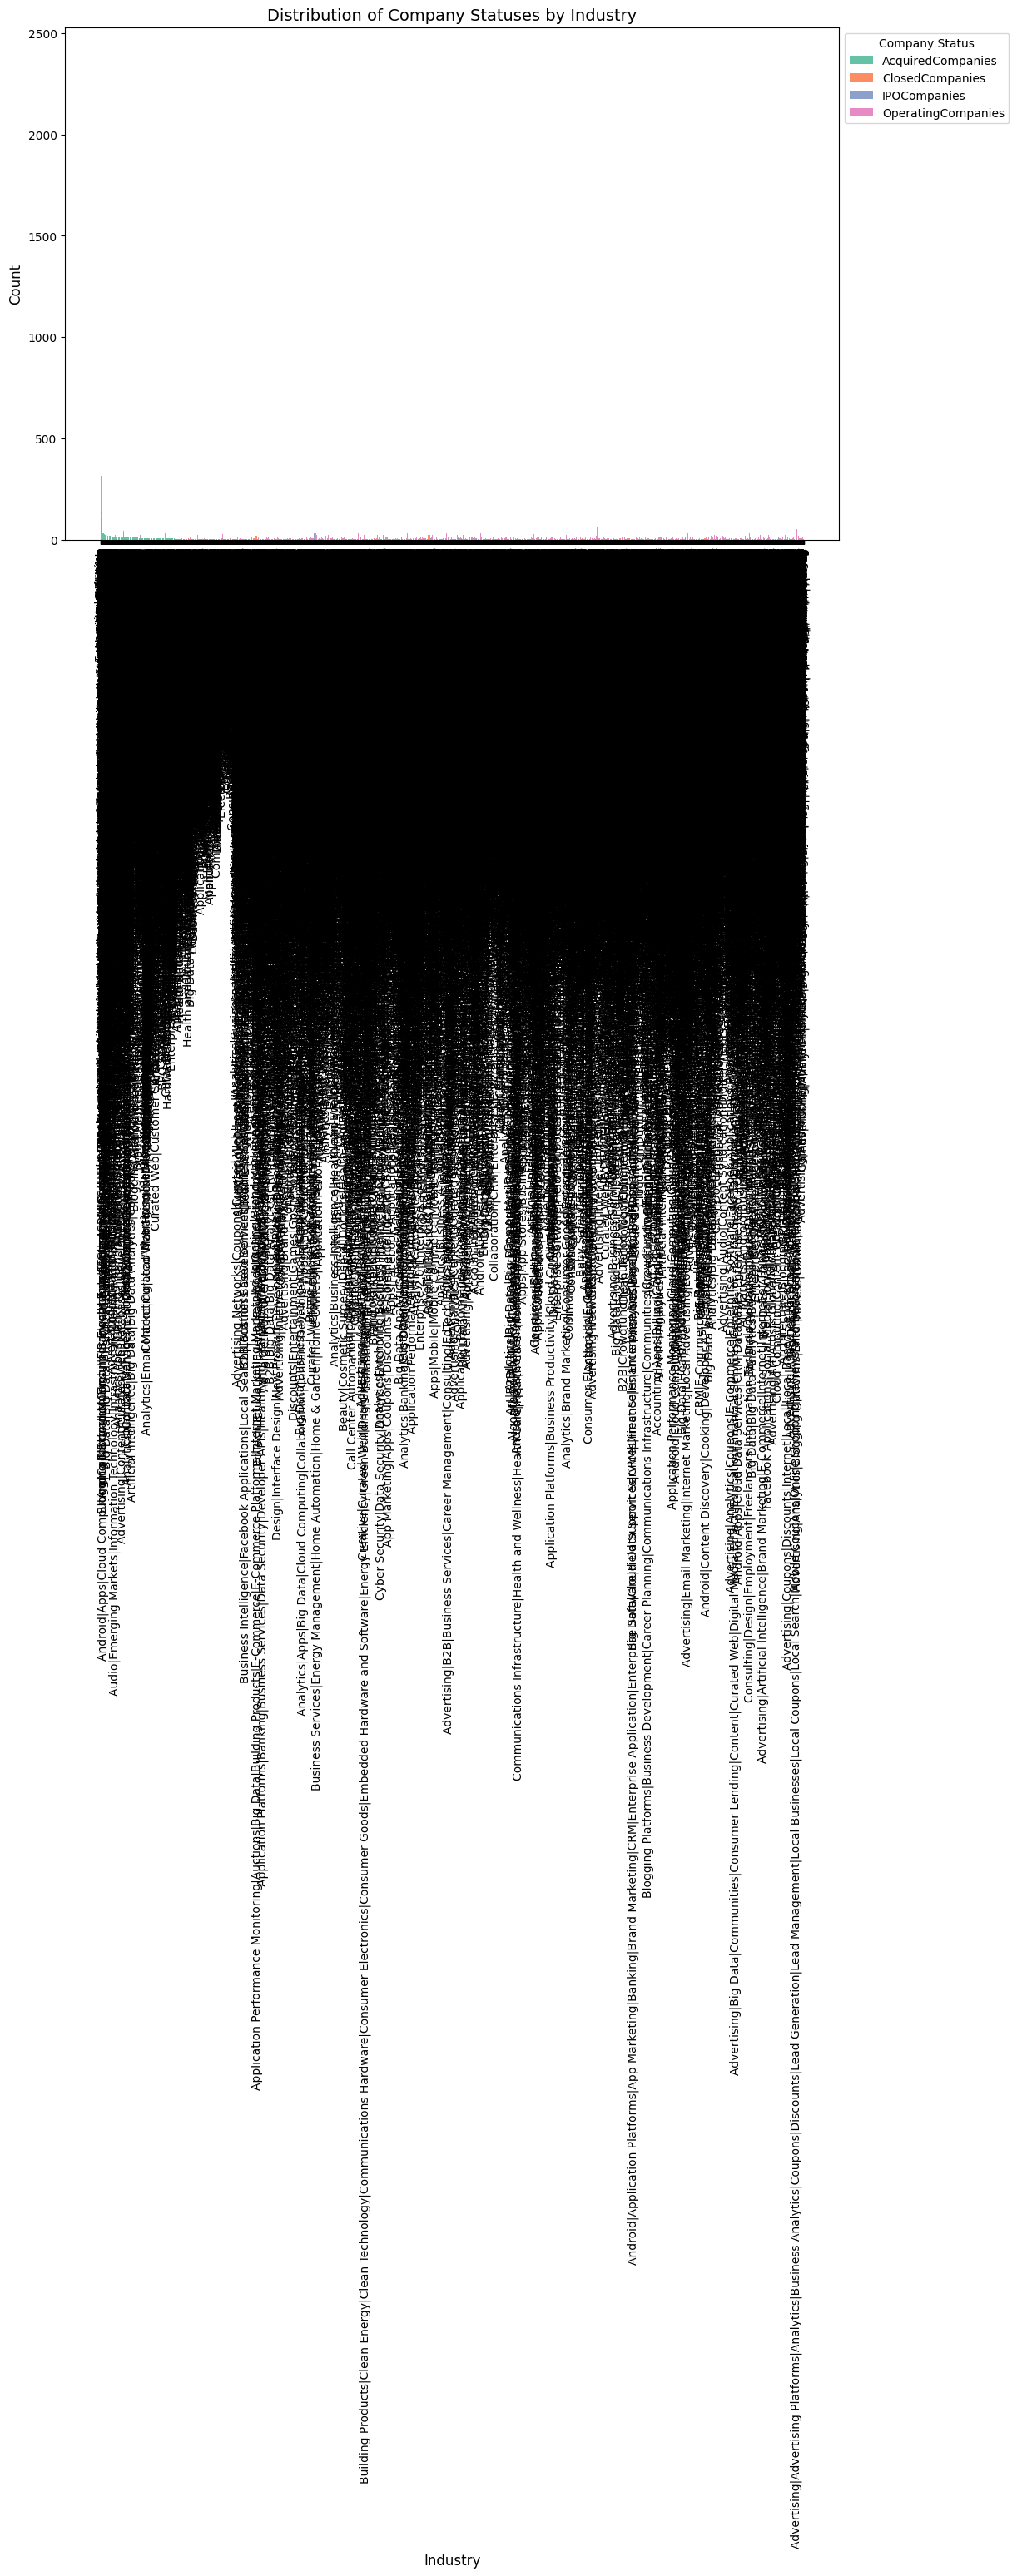

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'result' is the DataFrame containing the query results
result = spark.sql("""
    SELECT
        comp.category_list,
        sum(if(comp.status='acquired', 1, 0)) as AcquiredCompanies,
        sum(if(comp.status='closed', 1, 0)) as ClosedCompanies,
        sum(if(comp.status='ipo', 1, 0)) as IPOCompanies,
        sum(if(comp.status='operating', 1, 0)) as OperatingCompanies
    FROM
        (SELECT *, explode(split(category_list, '\\\\|')) AS category
        FROM global_temp.companies c
        LEFT JOIN global_temp.rounds r on LOWER(c.permalink) = LOWER(r.company_permalink)
        ) comp
    LEFT JOIN global_temp.mapping m on comp.category = m.category_list
    WHERE comp.raised_amount_usd IS NOT NULL
    GROUP BY comp.category_list
    ORDER BY AcquiredCompanies DESC
""").toPandas()

# Plotting a simple stacked bar chart for company statuses by industry
plt.figure(figsize=(12, 8))

# Stacked bar chart
bottom = None
statuses = ['AcquiredCompanies', 'ClosedCompanies', 'IPOCompanies', 'OperatingCompanies']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

for status, color in zip(statuses, colors):
    plt.bar(result['category_list'], result[status], bottom=bottom, label=status, color=color)
    if bottom is None:
        bottom = result[status]
    else:
        bottom += result[status]

plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Company Statuses by Industry', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Company Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

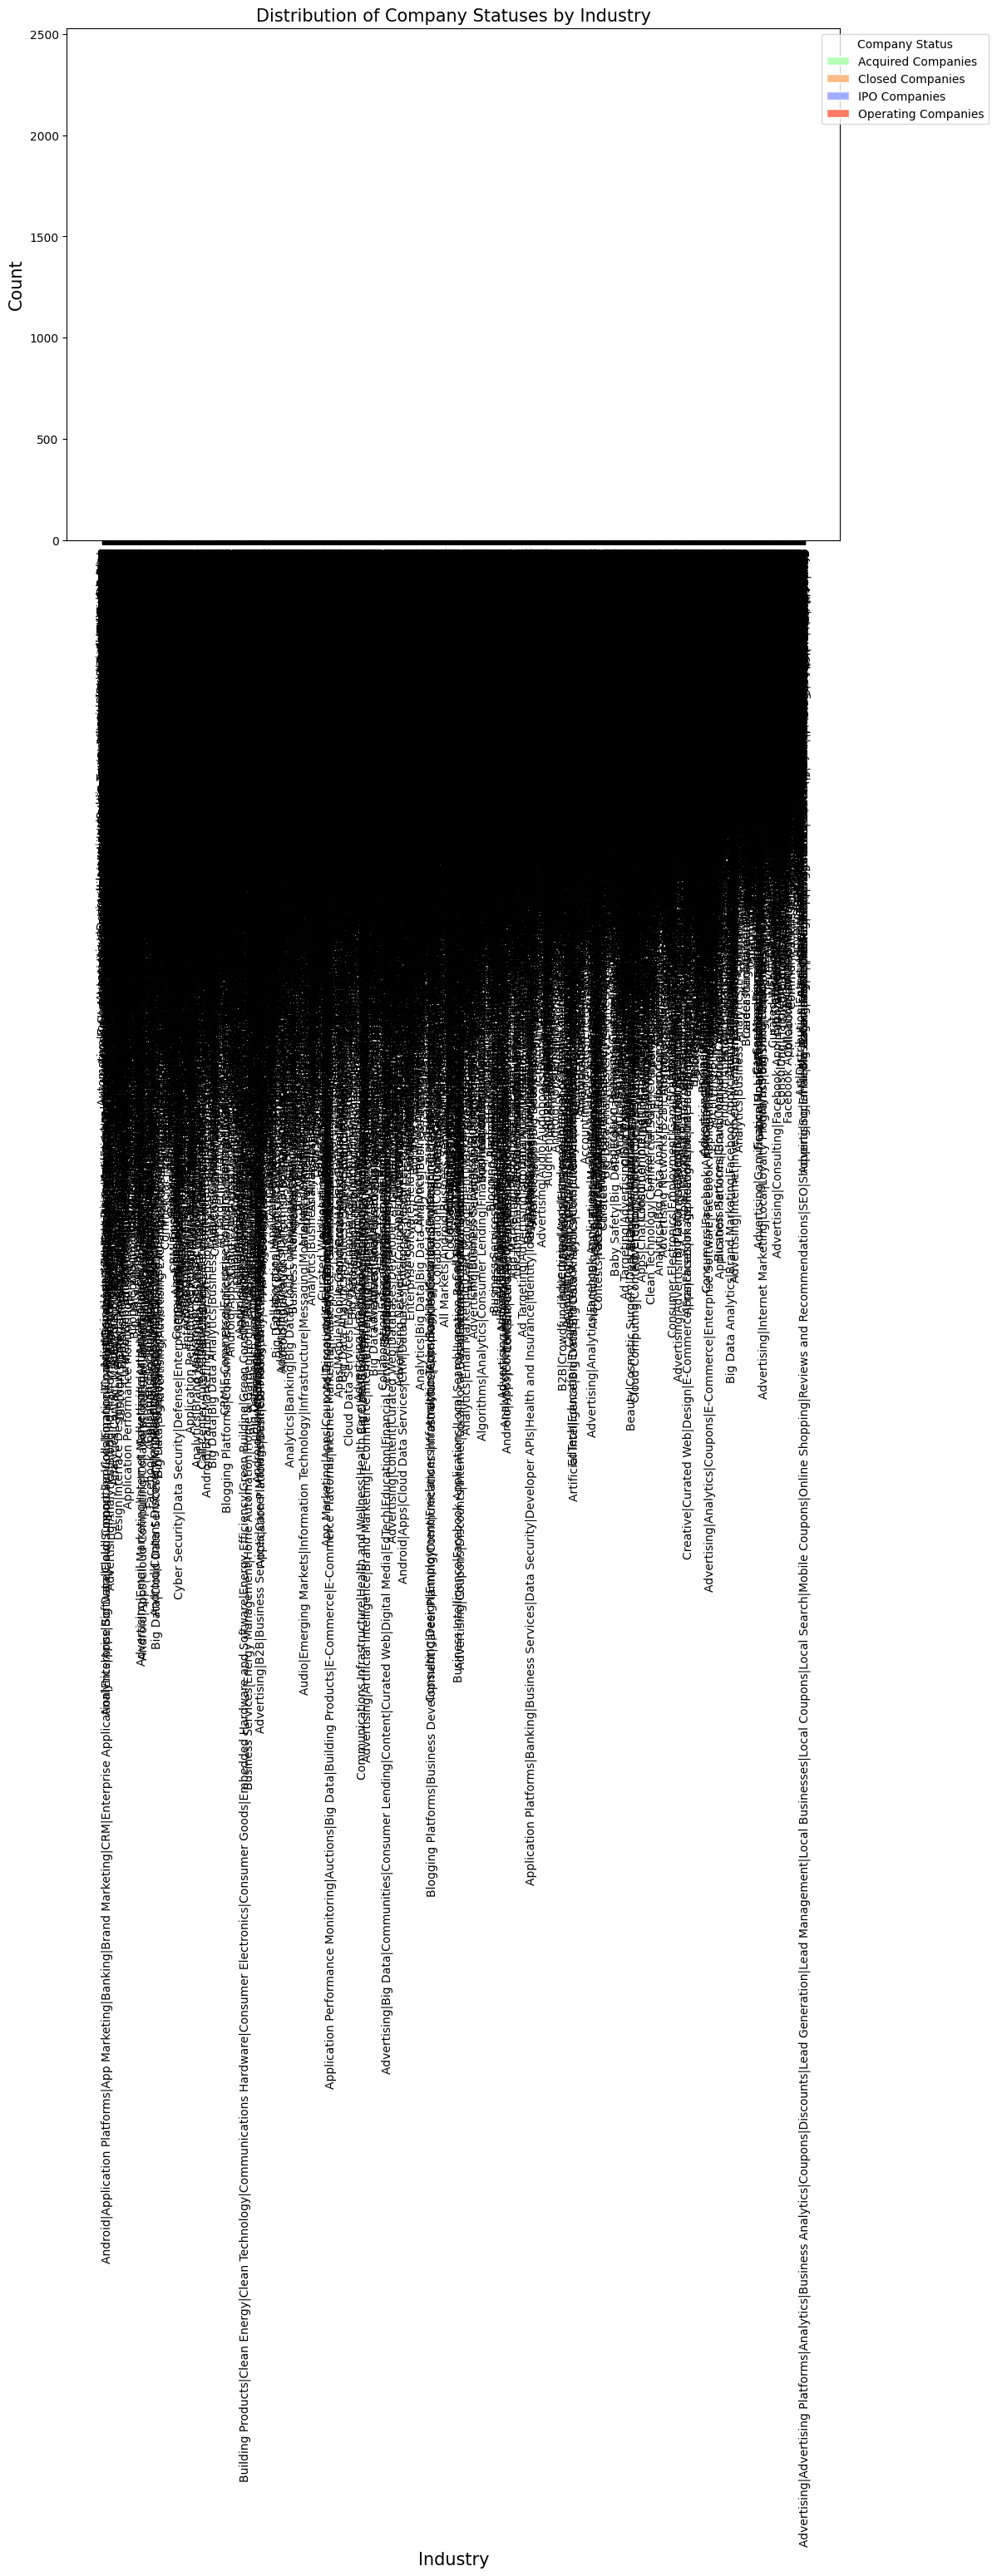

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'result' is the DataFrame containing the query results
result = spark.sql("""
    SELECT
        comp.category_list,
        sum(raised_amount_usd) as TotalInvestment,
        count(distinct comp.permalink) as CompanyCount,
        sum(if(comp.status='acquired', 1, 0)) as AcquiredCompanies,
        sum(if(comp.status='closed', 1, 0)) as ClosedCompanies,
        sum(if(comp.status='ipo', 1, 0)) as IPOCompanies,
        sum(if(comp.status='operating', 1, 0)) as OperatingCompanies
    FROM
        (SELECT *, explode(split(category_list, '\\\\|')) AS category
        FROM global_temp.companies c
        LEFT JOIN global_temp.rounds r on LOWER(c.permalink) = LOWER(r.company_permalink)
        ) comp
    LEFT JOIN global_temp.mapping m on comp.category = m.category_list
    WHERE comp.raised_amount_usd IS NOT NULL
    GROUP BY comp.category_list
    ORDER BY TotalInvestment DESC
""").toPandas()

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
barWidth = 0.85
names = result['category_list']
bars1 = result['AcquiredCompanies']
bars2 = result['ClosedCompanies']
bars3 = result['IPOCompanies']
bars4 = result['OperatingCompanies']

plt.bar(names, bars1, color='#b5ffb9', edgecolor='white', width=barWidth, label='Acquired Companies')
plt.bar(names, bars2, bottom=bars1, color='#f9bc86', edgecolor='white', width=barWidth, label='Closed Companies')
plt.bar(names, bars3, bottom=bars1+bars2, color='#a3acff', edgecolor='white', width=barWidth, label='IPO Companies')
plt.bar(names, bars4, bottom=bars1+bars2+bars3, color='#ff7c66', edgecolor='white', width=barWidth, label='Operating Companies')

# Custom x axis
plt.xticks(rotation=90)
plt.xlabel("Industry", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Distribution of Company Statuses by Industry", fontsize=15)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title="Company Status")

# Show the plot
plt.show()